# Setup

## Imports and fixed paths

In [1]:
# Imports

import os
import sys
import math
import random
import numpy as np
from netCDF4 import Dataset
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import xarray as xr
import pandas as pd
from importlib import reload 

In [2]:
#Paths

# Getting the path of the notebook (NOTE: not totally safe)
localdir = os.getcwd()

# Adding the code directory to the path (one directory up from notebook directory)
codedir = os.path.dirname(localdir)
sys.path.append(codedir)
from backtrack_loc import backtrack_loc
from plot_trajectories import plot_traj
from bt_validation import *

## User-defined parameters

In [3]:
# Trajectory parameters
json_file = 'ice_stations_dmitry.json'
json_data_Q2 = 'Q2'
period = '5y'
lmask = 'https://thredds.met.no/thredds/dodsC/metusers/emilyjd/LandOceanLakeMask_nh_ease2-250.nc'

# Defining and creating output directories
outdir = os.path.join(localdir, 'output')
outdir_cut = os.path.join(localdir, 'output/cutoverland')
outdir_notcut = os.path.join(localdir, 'output/notcutoverland')
for d in [outdir, outdir_cut, outdir_notcut]:
    if not os.path.isdir(d):
        os.makedirs(d)

# Running Backtracking

Note that this code still uses an inefficient way of dealing with trimming over land - there are 2 separate runs of the backtracking (it will obviously be more efficient to simply provide a flag for this)

## Ice Station trajectories

In [4]:
# Not cut over land
bt_Q2_notcut = backtrack_loc(json_file=json_file, json_data=json_data_Q2, period=period, outname=outdir_notcut,
              force=True, verbose=True)

# Cut over land
bt_Q2_cut = backtrack_loc(json_file=json_file, json_data=json_data_Q2, period=period, outname=outdir_cut,
              landmask_fp=lmask, ow_threshold_mid=50, force=True, verbose=True)

P3: Running backtracking in 1-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/notcutoverland/backtrack_loc_Q2_1d_20210503.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Polar_Stereographic_Grid (found in dt0)
Got NetCDF: Attribute not found
Tracking... 4%
GAP WARNING: No ice conc data available for 20210220, using data fo 20210219 instead (skip 1 days)
Tracking... 12%
Output file ready in /home/emilyjd/software/backtrack_locs/notebook/output/notcutoverland/backtrack_loc_Q2_1d_20210503.nc

P3: Running backtracking in 1-D mode
File /home/emilyjd/software/backtrack_locs/notebook/output/cutoverland/backtrack_loc_Q2_1d_20210503.nc exists and force is set, overwriting.
Info: read grid_mapping information from Lambert_Azimuthal_Grid (found in ice_conc)
Got NetCDF: Attribute not found
Info: read grid_mapping information from Po

# Plotting

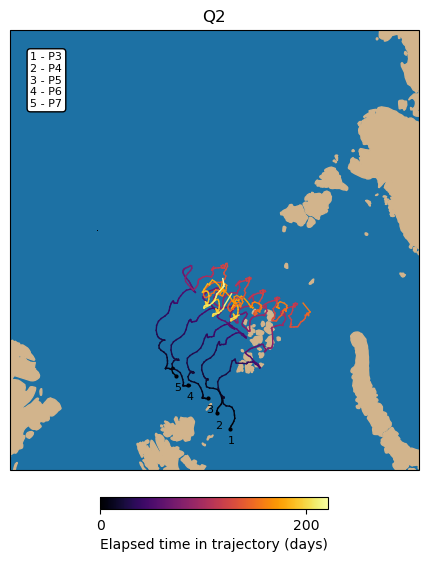

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/notcutoverland/backtrack_loc_Q2_1d_20210503_ts.png


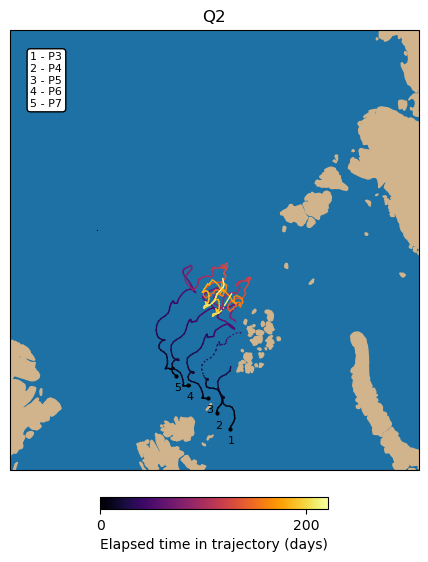

Figure is in /home/emilyjd/software/backtrack_locs/notebook/output/cutoverland/backtrack_loc_Q2_1d_20210503_ts.png


In [5]:
# Not cut over land
plot_traj(bt_Q2_notcut, region='ease-dmitry', colmode='timestep', output=outdir_notcut, label_traj=True)

# Cut over land
plot_traj(bt_Q2_cut, region='ease-dmitry', colmode='timestep', output=outdir_cut, label_traj=True)
